In [2]:
import pandas as pd
import matplotlib.pyplot as plt

customers = pd.read_csv("Customers.csv")  # Load the datasets
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [6]:
print("Customers Dataset:")   # Inspect data
print(customers.head(10), "\n")
print("Products Dataset:")
print(products.head(10), "\n")
print("Transactions Dataset:")
print(transactions.head(10), "\n")

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
5      C0006     Brittany Palmer  South America  2024-01-07
6      C0007         Paul Graves           Asia  2022-06-18
7      C0008            David Li  North America  2024-01-13
8      C0009           Joy Clark         Europe  2023-08-14
9      C0010           Aaron Cox         Europe  2022-12-15 

Products Dataset:
  ProductID                  ProductName     Category   Price
0      P001         ActiveWear Biography        Books  169.30
1      P002        ActiveWear Smartwatch  Electronics  346.30
2      P003      ComfortLiving Biography        Books   44.12
3      P004                BookWorld Rug   Home Decor

In [8]:
#Checking for missing values
print("Missing values in Customers:", customers.isnull().sum().sum())
print("Missing values in Products:", products.isnull().sum().sum())
print("Missing values in Transactions:", transactions.isnull().sum().sum())

Missing values in Customers: 0
Missing values in Products: 0
Missing values in Transactions: 0


In [10]:
# Checking for duplicates
print("Duplicate rows in Transactions:", transactions.duplicated().sum())
transactions.drop_duplicates(inplace=True)

Duplicate rows in Transactions: 0


In [12]:
# Convert dates to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

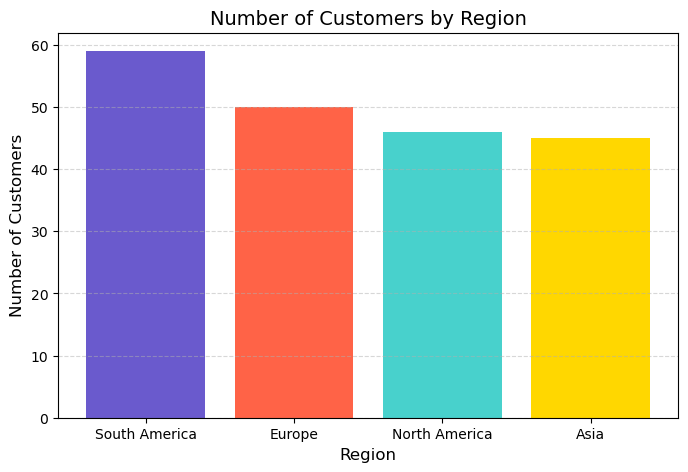

In [14]:
# Analyzing customer distribution by region
region_counts = customers['Region'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(region_counts.index, region_counts.values, color=['#6A5ACD', '#FF6347', '#48D1CC', '#FFD700'])
plt.title("Number of Customers by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

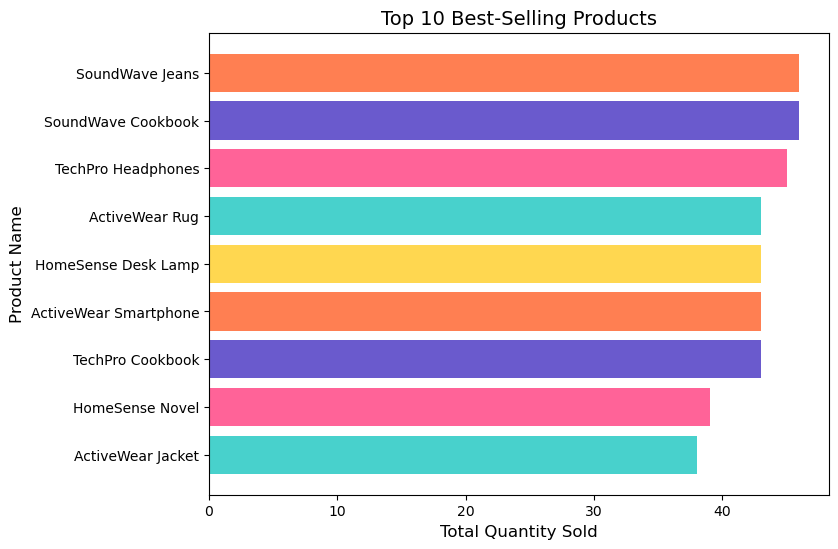

In [42]:
# Analyze top-selling products
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products = pd.merge(top_products, products, on='ProductID')

plt.figure(figsize=(8, 6))
plt.barh(top_products['ProductName'], top_products['Quantity'], color=['#FF7F52','#6A5ACD', '#FF6398', '#48D1Cc', '#FFD750'])
plt.title("Top 10 Best-Selling Products", fontsize=14)
plt.xlabel("Total Quantity Sold", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis
plt.show()

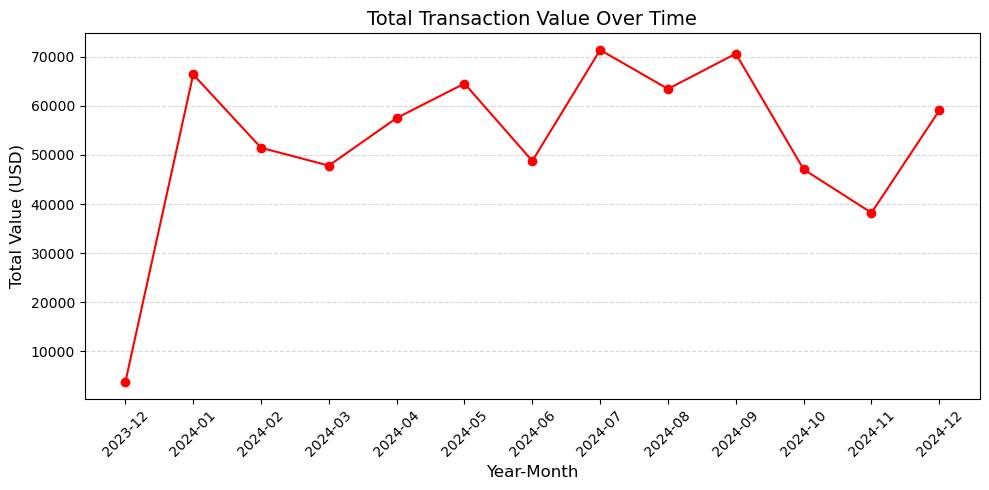

In [44]:
# Analyze monthly sales trends
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('YearMonth')['TotalValue'].sum()

plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', linestyle='-', color='red')
plt.title("Total Transaction Value Over Time", fontsize=14)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Total Value (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [46]:
average_transaction_value = transactions['TotalValue'].mean()
print(f"Average Transaction Value: ${average_transaction_value:.2f}")


Average Transaction Value: $690.00


In [57]:

import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Check for missing values across datasets
missing_values = {
    "Customers": customers.isnull().sum().sum(),
    "Products": products.isnull().sum().sum(),
    "Transactions": transactions.isnull().sum().sum()
}
print("Missing Values:", missing_values)



Missing Values: {'Customers': 0, 'Products': 0, 'Transactions': 0}


In [59]:
# Merge datasets for comprehensive analysis
merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')

# Derive total transaction value and group by region
region_sales = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)


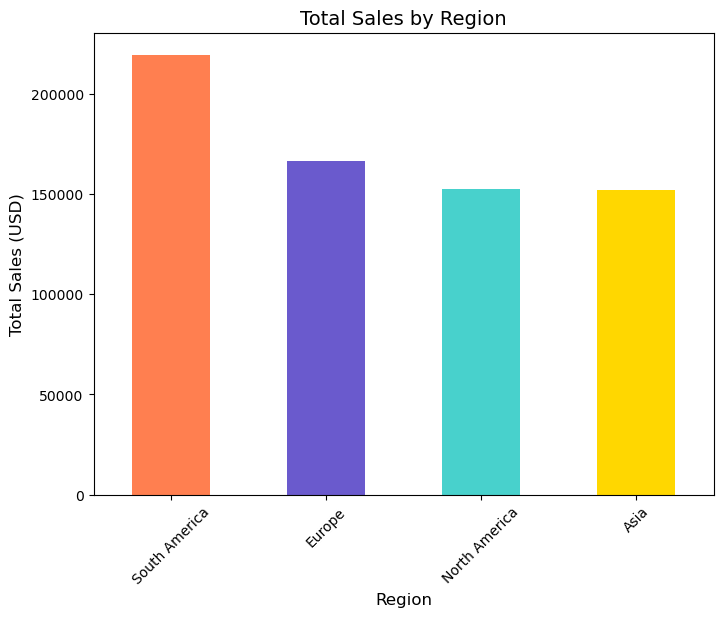

In [61]:
# Visualize regional sales distribution
plt.figure(figsize=(8, 6))
region_sales.plot(kind='bar', color=['#FF7F50', '#6A5ACD', '#48D1CC', '#FFD700', '#DC143C'])
plt.title("Total Sales by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.show()


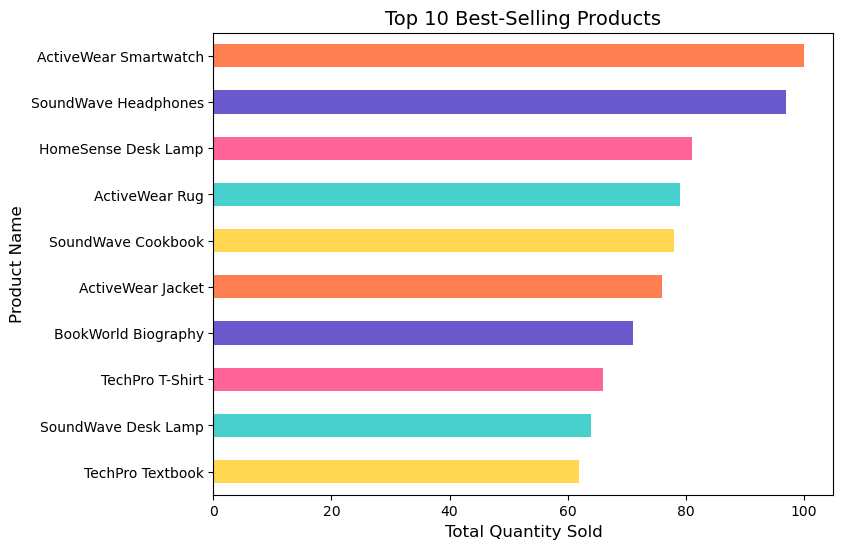

In [63]:
# Analyze top-selling products
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)

# Visualize top-selling products
plt.figure(figsize=(8, 6))
top_products.plot(kind='barh', color=['#FF7F52','#6A5ACD', '#FF6398', '#48D1Cc', '#FFD750'])
plt.title("Top 10 Best-Selling Products", fontsize=14)
plt.xlabel("Total Quantity Sold", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.gca().invert_yaxis()
plt.show()


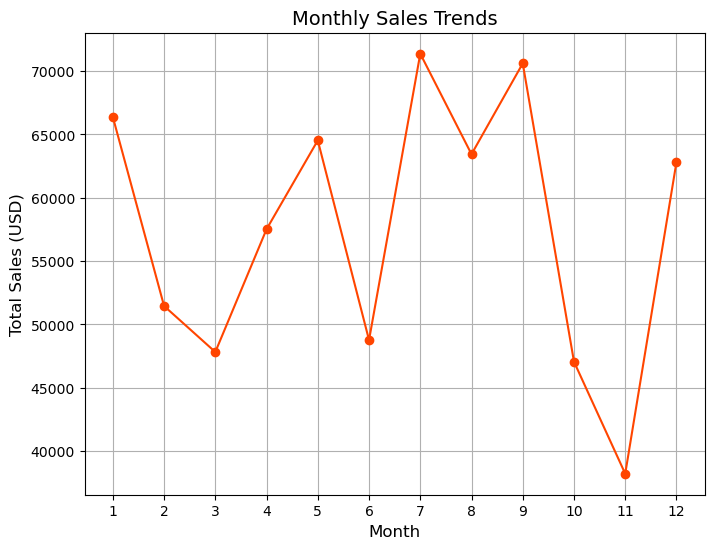

In [65]:
# Analyze customer tenure and transactions
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
recent_customers = merged_data[merged_data['SignupDate'] >= '2023-01-01']
recent_transactions = recent_customers['TransactionID'].count()

# Derive seasonal trends in sales
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['Month'] = merged_data['TransactionDate'].dt.month
monthly_sales = merged_data.groupby('Month')['TotalValue'].sum()

# Visualize seasonal sales trends
plt.figure(figsize=(8, 6))
monthly_sales.plot(kind='line', marker='o', color='#FF4500')
plt.title("Monthly Sales Trends", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()